# Art Generation with v Diffusion

---

[Github](https://github.com/eugenesiow/practical-ml/) | More Notebooks @ [eugenesiow/practical-ml](https://github.com/eugenesiow/practical-ml)

---

Notebook to generate artwork from an input prompt using a pre-trained model. 

We utilise the awesome [v-diffusion-jax](https://github.com/crowsonkb/v-diffusion-jax) library from the brilliant Katherine Crowson ([@RiversHaveWings](https://twitter.com/RiversHaveWings)) and Chainbreakers AI ([@jd_pressman](https://twitter.com/jd_pressman)) with the [pre-trained model](https://github.com/crowsonkb/v-diffusion-jax#model-checkpoints) to generate 256x256 art works. The model was trained on wiki art.

The notebook is structured as follows:
* Setting up the Environment
* Using the Models (Running Inference)

# Setting up the Environment

#### Ensure we have a GPU runtime

If you're running this notebook in Google Colab, select `Runtime` > `Change Runtime Type` from the menubar. Ensure that `GPU` is selected as the `Hardware accelerator`.

The models do require a `GPU` to run in a decent amount of time.



#### Setting up the Dependencies

First we will clone the `v-diffusion-jax` git repository from github and include `--recursive` so we get the `CLIP-JAX` repo as well.

In [ ]:
!git clone --recursive https://github.com/crowsonkb/v-diffusion-jax.git

Cloning into 'v-diffusion-jax'...
remote: Enumerating objects: 64, done.
remote: Counting objects: 100% (64/64), done.
remote: Compressing objects: 100% (44/44), done.
remote: Total 64 (delta 31), reused 51 (delta 18), pack-reused 0
Unpacking objects: 100% (64/64), done.
Submodule 'CLIP_JAX' (https://github.com/kingoflolz/CLIP_JAX) registered for path 'CLIP_JAX'
Cloning into '/content/v-diffusion-jax/CLIP_JAX'...
remote: Enumerating objects: 104, done.        
remote: Total 104 (delta 0), reused 0 (delta 0), pack-reused 104        
Receiving objects: 100% (104/104), 6.24 MiB | 17.27 MiB/s, done.
Resolving deltas: 100% (40/40), done.
Submodule path 'CLIP_JAX': checked out '7abbd61d2b6937988352301659c1f9218f2bef8b'


Next we install the required packages using `pip`.

In [ ]:
%cd v-diffusion-jax/
!pip install -qr requirements.txt

/content/v-diffusion-jax
     |████████████████████████████████| 287 kB 5.0 MB/s 
     |████████████████████████████████| 64 kB 1.9 MB/s 
     |████████████████████████████████| 118 kB 67.7 MB/s 
     |████████████████████████████████| 57 kB 4.4 MB/s 


# Using the Model (Running Inference)

First we download the checkpoint weights from the pre-trained model.

We want to create a `checkpoints` folder and download the model. We are using the `wikiart_256` model checkpoint.

In [ ]:
!mkdir -p checkpoints
!wget -O checkpoints/wikiart_256.pkl https://v-diffusion.s3.us-west-2.amazonaws.com/wikiart_256.pkl

--2021-11-10 06:43:54--  https://v-diffusion.s3.us-west-2.amazonaws.com/wikiart_256.pkl
Resolving v-diffusion.s3.us-west-2.amazonaws.com (v-diffusion.s3.us-west-2.amazonaws.com)... 52.218.218.25
Connecting to v-diffusion.s3.us-west-2.amazonaws.com (v-diffusion.s3.us-west-2.amazonaws.com)|52.218.218.25|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1164238121 (1.1G) [application/octet-stream]
Saving to: ‘checkpoints/wikiart_256.pkl’

checkpoints/wikiart 100%[===================>]   1.08G  40.9MB/s    in 26s     

2021-11-10 06:44:21 (42.1 MB/s) - ‘checkpoints/wikiart_256.pkl’ saved [1164238121/1164238121]



Next we run inference to generate our image from the prompt, using CLIP to guide the v diffusion. Feel free to change the input prompt and `seed`arguments.

It should take awhile to run the 1000 iterations.

In [ ]:
!./clip_sample.py "a friendly robot, watercolor by James Gurney" --model wikiart_256 --seed 0

100%|███████████████████████████████████████| 351M/351M [00:06<00:00, 57.7MiB/s]
2021-11-10 06:03:31.412951: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gemm_algorithm_picker.cc:211] Failed to find best cuBLAS algorithm, GEMM performance might be suboptimal: INTERNAL: All algorithms tried for %custom-call = f32[197,2304]{1,0} custom-call(f32[197,768]{1,0} %bitcast.3, f32[768,2304]{1,0} %parameter.2), custom_call_target="__cublas$gemm", backend_config="{\"alpha_real\":1,\"alpha_imag\":0,\"beta\":0,\"dot_dimension_numbers\":{\"lhs_contracting_dimensions\":[\"1\"],\"rhs_contracting_dimensions\":[\"0\"],\"lhs_batch_dimensions\":[],\"rhs_batch_dimensions\":[]},\"batch_size\":\"1\",\"lhs_stride\":\"151296\",\"rhs_stride\":\"1769472\"}" failed. Falling back to default algorithm. 
2021-11-10 06:03:31.723451: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gemm_algorithm_picker.cc:211] Failed to find best cuBLAS algorithm, GEMM performance might be suboptimal: IN

Our generated artwork is saved as `out_00000.png`, let's view it in our notebook.

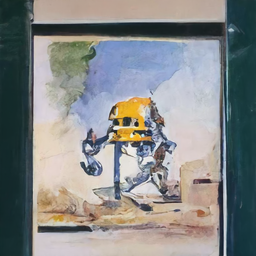

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

cv2_imshow(cv2.imread('./out_00000.png'))

We can connect to Google Drive with the following code. You can also click the `Files` icon on the left panel and click `Mount Drive` to mount your Google Drive.

The root of your Google Drive will be mounted to `/content/drive/My Drive/`. If you have problems mounting the drive, you can check out this [tutorial](https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166).

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

You can move the output files which are saved in the `/content/` directory to the root of your Google Drive.

In [ ]:
import shutil
shutil.move('/content/v-diffusion-jax/out_00000.png', '/content/drive/My Drive/sample.jpg')

More Notebooks @ [eugenesiow/practical-ml](https://github.com/eugenesiow/practical-ml) and do star or drop us some feedback on how to improve the notebooks on the [Github repo](https://github.com/eugenesiow/practical-ml/).